<a href="https://colab.research.google.com/github/plaban1981/Huggingface_transformers_course/blob/main/huggingface_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Huggingface

The natural language processing (NLP) using libraries from the Hugging Face ecosystem 
* 🤗 Transformers, 
* 🤗 Datasets, 
* 🤗 Tokenizers, and 
* 🤗 Accelerate — as well as the Hugging Face Hub.

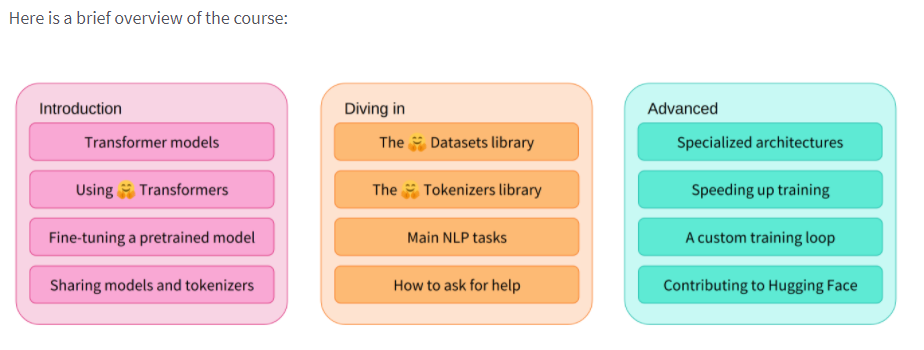

## Natural Language Processing

NLP is a field of linguistics and machine learning focused on understanding everything related to human language. The aim of NLP tasks is not only to understand single words individually, but to be able to understand the context of those words.

The following is a list of common NLP tasks, with some examples of each:

* **Classifying whole sentences:** Getting the sentiment of a review, detecting if an email is spam, determining if a sentence is grammatically correct or whether two sentences are logically related or not 

* **Classifying each word in a sentence:** Identifying the grammatical components of a sentence (noun, verb, adjective), or the named entities (person, location, organization)

* **Generating text content:** Completing a prompt with auto-generated text, filling in the blanks in a text with masked words

* **Extracting an answer from a text:** Given a question and a context, extracting the answer to the question based on the information provided in the context

* **Generating a new sentence from an input text:** Translating a text into another language, summarizing a text

## Why is it challenging?

Computers don’t process information in the same way as humans.For machine learning (ML) models, such tasks are more difficult. The text needs to be processed in a way that enables the model to learn from it. And because language is complex, we need to think carefully about how this processing must be done.

## Transformers, what can they do?
Transformer models are used to solve all kinds of NLP tasks, like the ones mentioned in the previous section.

* The most basic object in the 🤗 Transformers library is the **pipeline**. 

* It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer

In [ ]:
! pip install datasets transformers

     |████████████████████████████████| 245kB 31.1MB/s 
     |████████████████████████████████| 2.5MB 29.2MB/s 
     |████████████████████████████████| 122kB 40.8MB/s 
     |████████████████████████████████| 245kB 41.3MB/s 
     |████████████████████████████████| 3.3MB 41.5MB/s 
     |████████████████████████████████| 901kB 35.0MB/s 
ERROR: transformers 4.8.2 has requirement huggingface-hub==0.0.12, but you'll have huggingface-hub 0.0.13 which is incompatible.


In [ ]:
import transformers
from transformers import pipeline
#
classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

* By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. 

* The model is downloaded and cached when you create the classifier object. 

* If you rerun the command, the cached model will be used instead and there is no need to download the model again.

## Passing several sentences

In [ ]:
sentence_list = ["I've been waiting for a HuggingFace course my whole life.", 
"I hate this so much!",
 "I enjoy eating ice-cream",
 "I am not in a mood to talk"
]

In [ ]:
classifier(sentence_list)

[{'label': 'POSITIVE', 'score': 0.9598047733306885},
 {'label': 'NEGATIVE', 'score': 0.9994558095932007},
 {'label': 'POSITIVE', 'score': 0.999464213848114},
 {'label': 'NEGATIVE', 'score': 0.9996479153633118}]

* Here the classifier that was cached was used for classification.

There are three main steps involved when you pass some text to a pipeline:

* The text is preprocessed into a format the model can understand.

* The preprocessed inputs are passed to the model.

* The predictions of the model are post-processed, so you can make sense of them.

## Currently available pipelines

* feature-extraction (get the vector representation of a text)
* fill-mask
ner (named entity recognition)
* question-answering
* sentiment-analysis
* summarization
* text-generation
* translation
* zero-shot-classification

## feature-extraction 

In [ ]:
classifier = pipeline("feature-extraction")
doc_matrix = classifier("I've been waiting for a HuggingFace course my whole life.")

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
type(doc_matrix),len(doc_matrix)

(list, 1)

In [ ]:
import numpy as np
np.array(doc_matrix).shape

(1, 18, 768)

## Zero-shot classification

* It is used to classify texts that haven’t been labelled.
* This pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model

In [ ]:
import transformers
from transformers import pipeline
classifier = pipeline('zero-shot-classification')
result = classifier(
    ["Mr Modi is the prime minister of India"],
    candidate_labels=["education", "politics", "business","entertainment","medicine"],
)

##Visualize Predictions

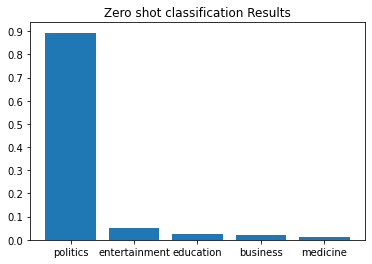

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(result['labels'],result['scores'])
plt.yticks(list(np.arange(0,1,0.1)))
plt.title("Zero shot classification Results")
plt.show()

In [ ]:
classifier = pipeline('zero-shot-classification')
classifier(
    ["Mr Modi is the prime minister of India",
     "Rhihana's next album is a massive hit",
     "Vitamin C is very much esstential to boost immunity",
     "I am applying for a post graduate program in AI"],
    candidate_labels=["education", "politics", "business","entertainment","medicine"],
)

[{'labels': ['politics', 'entertainment', 'education', 'business', 'medicine'],
  'scores': [0.8936405777931213,
   0.0492694154381752,
   0.02371794730424881,
   0.019631482660770416,
   0.01374071091413498],
  'sequence': 'Mr Modi is the prime minister of India'},
 {'labels': ['entertainment', 'business', 'education', 'medicine', 'politics'],
  'scores': [0.8401675820350647,
   0.11878533661365509,
   0.014939829707145691,
   0.014485985971987247,
   0.011621265672147274],
  'sequence': "Rhihana's next album is a massive hit"},
 {'labels': ['medicine', 'business', 'entertainment', 'education', 'politics'],
  'scores': [0.8594235777854919,
   0.08075584471225739,
   0.029811637476086617,
   0.017714107409119606,
   0.012294779531657696],
  'sequence': 'Vitamin C is very much esstential to boost immunity'},
 {'labels': ['education', 'business', 'entertainment', 'medicine', 'politics'],
  'scores': [0.3992269039154053,
   0.22472915053367615,
   0.1697494387626648,
   0.1079407855868339

**This pipeline is called zero-shot because we don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want!**

## Text generation

* This model will auto-complete the input text by generating the remaining text. 

* Text generation involves randomness, so it is normal if we do not get the same results

In [ ]:
from transformers import pipeline
generator = pipeline("text-generation")
generator("I am applying for a post graduate program in AI")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I am applying for a post graduate program in AI, specifically in neural networks and machine learning. I have been working on an open source neural network library for years and it has finally completed its initial code base. I believe I can continue to develop,'}]

* we can control how many different sequences are generated with the argument **num_return_sequences** and the total length of the output text with the argument **max_length**.

In [ ]:
generator = pipeline("text-generation")
generator("I am applying for a post graduate program in AI",
          num_return_sequences=15,
          max_length =80)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I am applying for a post graduate program in AI and I need some help to make sure I am getting the right training in all levels and environments. You can start by filling out an online survey.\n\nWhat should I do?\n\nIf you are in a position that is not considered a full time intern on campus, you may be able to submit a short research project on your own,'},
 {'generated_text': 'I am applying for a post graduate program in AI Research and Design. I will spend the next two years working with top research universities including Stanford, Berkeley, Columbia, Washington and Carnegie Mellon. I have never worked directly with someone in the field of artificial intelligence. I will be conducting research into computational and optimization algorithms and data science in a team that knows very little about software. As an undergraduate graduate I'},
 {'generated_text': "I am applying for a post graduate program in AI in London with a focus on machine learning and AI at th

## Using any model from the Hub in a pipeline

The previous examples used the default model for the task at hand, but you can also choose a particular model from the Hub to use in a pipeline for a specific task — say, text generation.(https://huggingface.co/models)

In [ ]:
from transformers import pipeline
generator = pipeline("text-generation",model="distilgpt2")
generator("I am preparing dinner for my friends",max_length=30,
    num_return_sequences=2,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I am preparing dinner for my friends this fall, and I won't be afraid to show up at a picnic to get my lunch prepared for dinner."},
 {'generated_text': "I am preparing dinner for my friends in the next couple of weeks. It's a great time for friends to have fun getting to know each other."}]

## xlnet-base-cased

In [ ]:
generator = pipeline("text-generation",model="xlnet-base-cased")
generator("I am preparing dinner for my friends",max_length=30,
    num_return_sequences=2,
)

[{'generated_text': 'I am preparing dinner for my friends in New Zealand on Saturday evening, at 6 pm. As the sun set, my father and sister of mine sat'},
 {'generated_text': 'I am preparing dinner for my friends to come up and sit down tomorrow. This morning I am going to make dinner for my girlfriend and her friend.'}]

## gpt2

In [ ]:
generator = pipeline("text-generation",model="gpt2")
generator("I am preparing dinner for my friends",max_length=30,
    num_return_sequences=2,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I am preparing dinner for my friends on the show.\n\nAs I have done for other members of the show, I will be giving them the'},
 {'generated_text': 'I am preparing dinner for my friends and I shall go to the hospital to watch the ambulance pull up and leave in the morning. I am only twenty'}]

## Mask filling

* The idea of this task is to fill in the blanks in a given text
* The **top_k** argument controls how many possibilities you want to be displayed


In [ ]:
from transformers import pipeline
unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

[{'score': 0.19619838893413544,
  'sequence': 'This course will teach you all about mathematical models.',
  'token': 30412,
  'token_str': ' mathematical'},
 {'score': 0.040527306497097015,
  'sequence': 'This course will teach you all about computational models.',
  'token': 38163,
  'token_str': ' computational'}]

In [ ]:
unmasker("<mask> and jill went up the hill.", top_k=2)

[{'score': 0.0057667833752930164,
  'sequence': 'me and jill went up the hill.',
  'token': 1794,
  'token_str': 'me'},
 {'score': 0.005751325283199549,
  'sequence': 'Jack and jill went up the hill.',
  'token': 20907,
  'token_str': 'Jack'}]

* Other mask-filling models might have different mask tokens,

In [ ]:
unmasker = pipeline('fill-mask', model='bert-base-cased')
unmasker("Eating right will help to keep [MASK] fit and fine", top_k=2)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.6889556050300598,
  'sequence': 'Eating right will help to keep you fit and fine',
  'token': 1128,
  'token_str': 'you'},
 {'score': 0.09383866935968399,
  'sequence': 'Eating right will help to keep her fit and fine',
  'token': 1123,
  'token_str': 'her'}]

## Named entity recognition
Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as 
* persons, 
* locations, or 
* organizations

In [ ]:
from transformers import pipeline
ner = pipeline("ner", grouped_entities=True)
ner('Apple sold products worth $12 million in the states')

[{'end': 5,
  'entity_group': 'ORG',
  'score': 0.9971675276756287,
  'start': 0,
  'word': 'Apple'}]

* We pass the option **grouped_entities=True** in the pipeline creation function to tell the pipeline to regroup together the parts of the sentence that correspond to the same entity

In [ ]:
ner('Plaban works as a software engineer with Apple inc.')

[{'end': 6,
  'entity_group': 'PER',
  'score': 0.9800496697425842,
  'start': 0,
  'word': 'Plaban'},
 {'end': 46,
  'entity_group': 'ORG',
  'score': 0.9988816976547241,
  'start': 41,
  'word': 'Apple'}]

## Question answering
* The question-answering pipeline answers questions using information from a given context

* This pipeline works by extracting information from the provided context

* It does not generate the answer.

In [ ]:
from transformers import pipeline
question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I have for dinner?",
    context= "I have rice and dal for dinner"
)

{'answer': 'rice and dal', 'end': 19, 'score': 0.8400872945785522, 'start': 7}

##Summarization

Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text.

* we can specify a **max_length** or a **min_length** for the result.

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer("""
   For a while, research in object detection in images was guided by HOG and its variants, including computationally expensive methods such as the Deformable Parts Model and Exemplar SVMs.

In each of these situations, an algorithm was hand-defined to quantify and encode a particular aspect of an image (i.e., shape, texture, color, etc.). Given an input image of pixels, we would apply our hand-defined algorithm to the pixels, and in return receive a feature vector quantifying the image contents — the image pixels themselves did not serve a purpose other than being inputs to our feature extraction process. The feature vectors that resulted from feature extraction were what we were truly interested in as they served as inputs to our machine learning models.

Deep learning, and specifically Convolutional Neural Networks, take a different approach. Instead of hand-defining a set of rules and algorithms to extract features from an image, these features are instead automatically learned from the training process.

Again, let’s return to the goal of machine learning: computers should be able to learn from experience (i.e., examples) of the problem they are trying to solve.

Using deep learning, we try to understand the problem in terms of a hierarchy of concepts. Each concept builds on top of the others. Concepts in the lower-level layers of the network encode some basic representation of the problem, whereas higher-level layers use these basic layers to form more abstract concepts. This hierarchical learning allows us to completely remove the hand-designed feature extraction process and treat CNNs as end-to-end learners.

Given an image, we supply the pixel intensity values as inputs to the CNN. A series of hidden layers are used to extract features from our input image. These hidden layers build upon each other in a hierarchal fashion. At first, only edge-like regions are detected in the lower-level layers of the network. These edge regions are used to define corners (where edges intersect) and contours (outlines of objects). Combining corners and contours can lead to abstract “object parts” in the next layer.
""")

[{'summary_text': ' For a while, research in object detection in images was guided by HOG and its variants such as the Deformable Parts Model and Exemplar SVMs . Instead of hand-defining a set of rules and algorithms to extract features from an image, these features are instead automatically learned from the training process .'}]

## Translation
For translation, you can use a default model if you provide a language pair in the task name (such as **"translation_en_to_fr"**)

* Helsinki-NLP/opus-mt-en-fr

In [ ]:
!pip install --no-cache-dir transformers sentencepiece

     |████████████████████████████████| 2.5MB 5.0MB/s 
     |████████████████████████████████| 1.2MB 30.2MB/s 
     |████████████████████████████████| 3.3MB 42.5MB/s 
     |████████████████████████████████| 901kB 36.0MB/s 


In [ ]:
from transformers import pipeline
import sentencepiece
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en",use_fast=False)
translator("Ce cours est produit par Hugging Face.")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


[{'translation_text': 'This course is produced by Hugging Face.'}]

In [ ]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr",use_fast=False)
translator("I love working with Hugging Face.")

[{'translation_text': "J'adore travailler avec Hugging Face."}]

## Transformers are language models

* Transformers can be  grouped into three categories:

     * GPT-like (also called auto-regressive Transformer models)
     * BERT-like (also called auto-encoding Transformer models)
     * BART/T5-like (also called sequence-to-sequence Transformer models)

All the  above Transformer models (GPT, BERT, BART, T5, etc.) have been trained as language models. 

* This means they have been trained on large amounts of raw text in a self-supervised fashion.

* Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!


* This type of model develops a statistical understanding of the language it has been trained on, but it’s not very useful for specific practical tasks. 
* Because of this, the general pretrained model then goes through a process called transfer learning. During this process, the model is fine-tuned in a supervised way — that is, using human-annotated labels — on a given task.

Example of Transfer Learning

* causal language modeling - here the output depends on the past and present inputs, but not the future ones
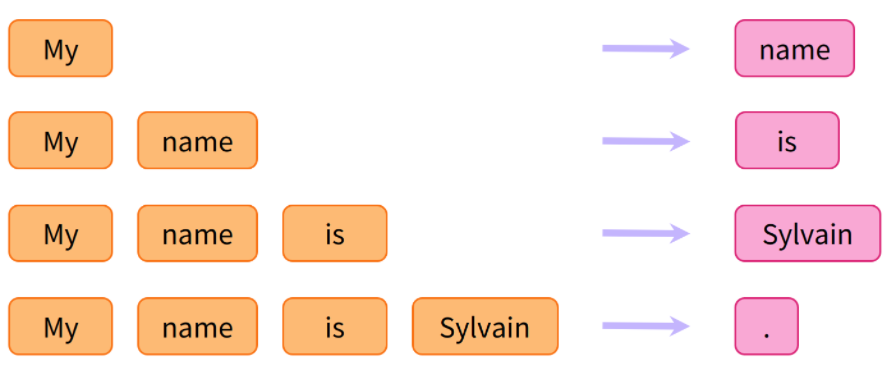

*  masked language modeling - here  the model predicts a masked word in the sentence.

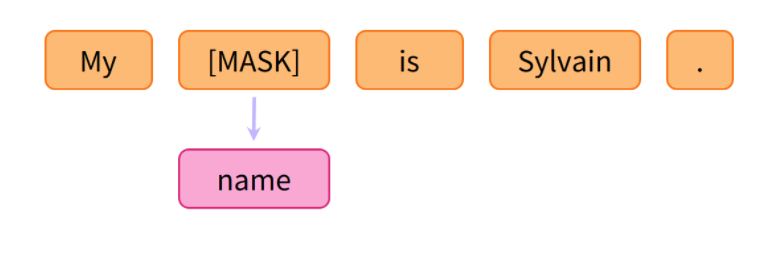

## Transformers are big models

* training a model, especially a large one, requires a large amount of data and it becomes very costly in terms of training time and compute resources


* Pretraining is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.
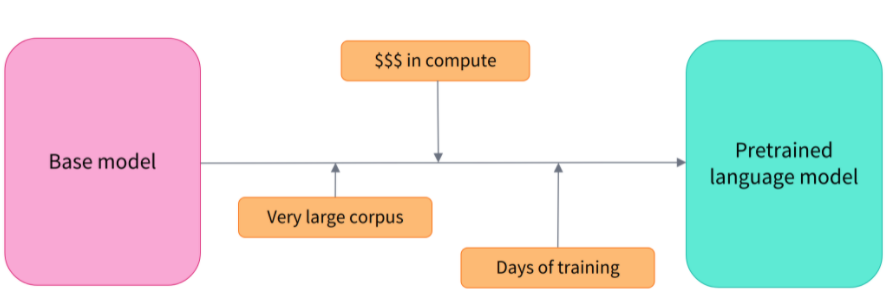




## Advantages of pretrained models

* The pretrained model was already trained on a dataset that has some similarities with the fine-tuning dataset. The fine-tuning process is thus able to take advantage of knowledge acquired by the initial model during pretraining (for instance, with NLP problems, the pretrained model will have some kind of statistical understanding of the language you are using for your task).
* Since the pretrained model was already trained on lots of data, the fine-tuning requires way less data to get decent results.
* For the same reason, the amount of time and resources needed to get good results are much lower.

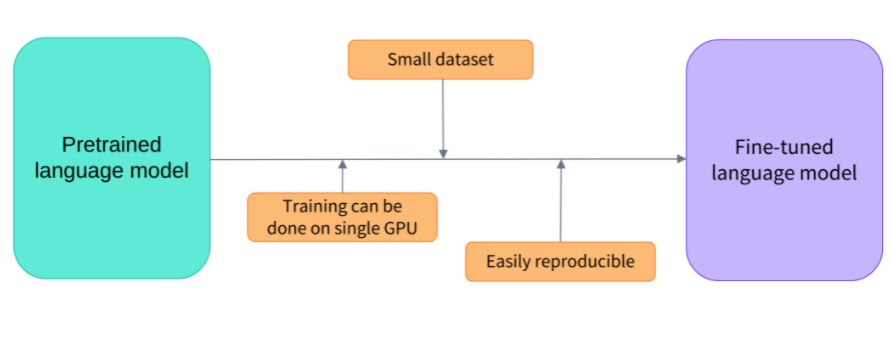


* Fine-tuning, on the other hand, is the training done after a model has been pretrained.

## Transformer Architecture

The model is primarily composed of two blocks:

* Encoder (left): The encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input.

* Decoder (right): The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs.


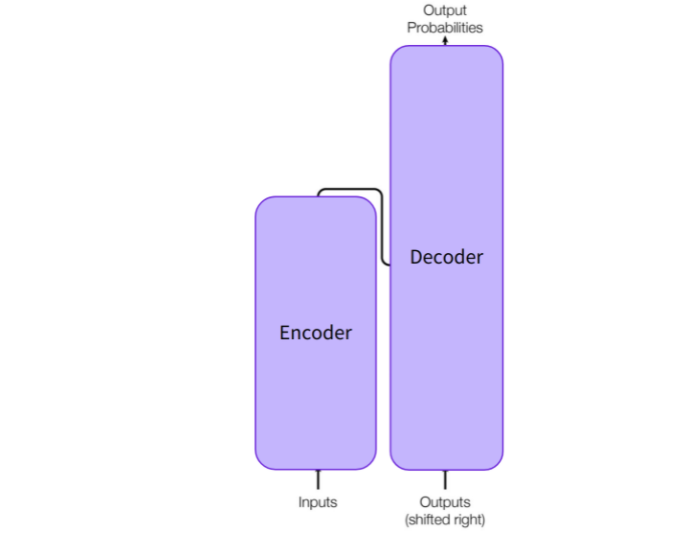

Each of these parts can be used independently, depending on the task:

* **Encoder-only models:** Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.

* **Decoder-only models:** Good for generative tasks such as text generation.

* **Encoder-decoder models or sequence-to-sequence models:**` Good for generative tasks that require an input, such as translation or summarization.

## Attention layers

A key feature of Transformer models is that they are built with special layers called attention layers.

* The attention layer will tell the model to pay specific attention to certain words in the sentence you passed it (and more or less ignore the others) when dealing with the representation of each word.


#### Transformer Architecture

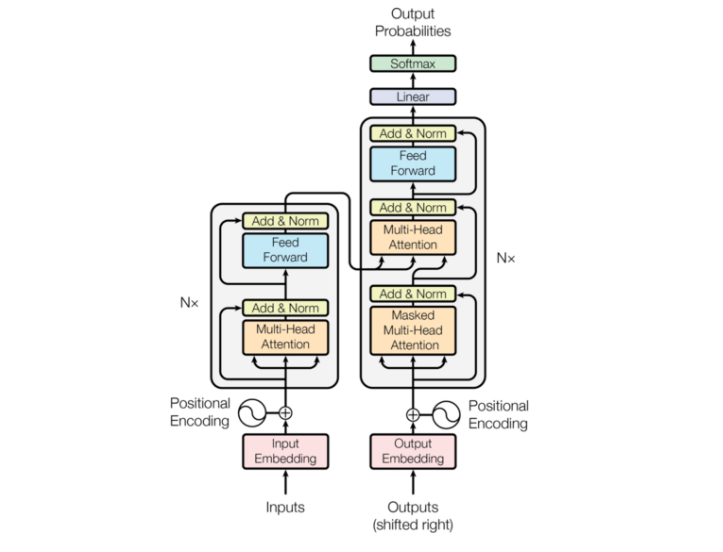

*  first attention layer in a decoder block pays attention to all (past) inputs to the decoder, 
* but the second attention layer uses the output of the encoder. 

It can thus access the whole input sentence to best predict the current word.

This is very useful as different languages can have grammatical rules that put the words in different orders, or some context provided later in the sentence may be helpful to determine the best translation of a given word.

* The attention mask can also be used in the encoder/decoder to prevent the model from paying attention to some special words — for instance, the special padding word used to make all the inputs the same length when batching together sentences.

## Architectures vs. checkpoints

* Architecture: This is the skeleton of the model — the definition of each layer and each operation that happens within the model.

* Checkpoints: These are the weights that will be loaded in a given architecture.

* Model: This is an umbrella term that isn’t as precise as “architecture” or “checkpoint”: it can mean both.

For example, BERT is an architecture while bert-base-cased, a set of weights trained by the Google team for the first release of BERT, is a checkpoint. However, one can say “the BERT model” and “the bert-base-cased model.”

## Encoder Models
* Encoder models use only the encoder of a Transformer model
* At each stage, the attention layers can access all the words in the initial sentence.

* These models are often characterized as having “bi-directional” attention, and are often called **auto-encoding models**.

* The pretraining of these models usually revolves around somehow corrupting a given sentence (for instance, by masking random words in it) and tasking the model with finding or reconstructing the initial sentence.

* Encoder models are best suited for tasks requiring an understanding of the full sentence, such as sentence classification, named entity recognition (and more generally word classification), and extractive question answering.


* Representatives of this family of models include:

    * ALBERT
    * BERT
    * DistilBERT
    * ELECTRA
    * RoBERTa

## Decoder models

* Decoder models use only the decoder of a Transformer model
* At each stage, for a given word the attention layers can only access the words positioned before it in the sentence. 
* These models are often called **auto-regressive models**.
* The pretraining of decoder models usually revolves around predicting the next word in the sentence.
* These models are best suited for tasks involving text generation.

* Representatives of this family of models include:

    * CTRL
    * GPT
    * GPT-2
    * Transformer XL


## Sequence-to-sequence models

* Encoder-decoder models (also called **sequence-to-sequence models**) use both parts of the Transformer architecture.
* At each stage, the attention layers of the encoder can access all the words in the initial sentence, whereas the attention layers of the decoder can only access the words positioned before a given word in the input.
* The pretraining of these models can be done using the objectives of encoder or decoder models, but usually involves something a bit more complex
* Sequence-to-sequence models are best suited for tasks revolving around generating new sentences depending on a given input, such as summarization, translation, or generative question answering.

* Representatives of this family of models include:

    * BART
    * mBART
    * Marian
    * T5

## Bias and limitations
 
* Limitations : to enable pretraining on large amounts of data, researchers often scrape all the content they can find, taking the best as well as the worst of what is available on the internet.

## example of a fill-mask pipeline with the BERT model:

In [ ]:
import transformers
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']


In [ ]:
result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


## Default "fill-mask"

In [ ]:
unmasker = pipeline("fill-mask")
result = unmasker("This man works as a <mask>.")
print([r["token_str"] for r in result])


[' translator', ' consultant', ' bartender', ' waiter', ' courier']


In [ ]:
result = unmasker("This woman works as a <mask>.")
print([r["token_str"] for r in result])

[' waitress', ' translator', ' nurse', ' bartender', ' consultant']


* When asked to fill in the missing word in these two sentences, the model gives only one gender-free answer (waiter/waitress). 

*  BERT is one of the rare Transformer models not built by scraping data from all over the internet, but rather using apparently neutral data (it’s trained on the English Wikipedia and BookCorpus datasets).

* We therefore need to keep in the back of your mind that the original model you are using could very easily generate sexist, racist, or homophobic content. 
* Fine-tuning the model on custom data won’t make this intrinsic bias disappear.



## Summary 
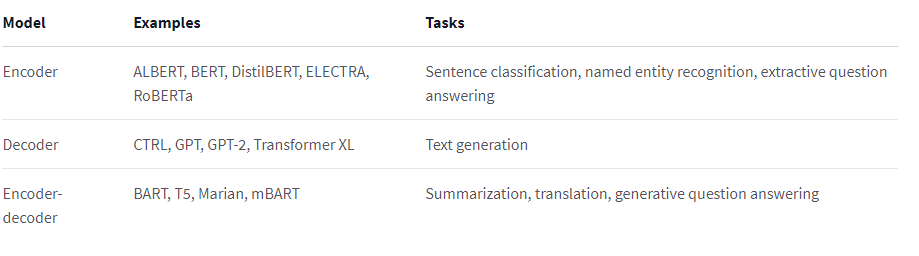

## End-of-chapter quiz

1. Explore the Hub and look for the roberta-large-mnli checkpoint. What task does it perform?

* Ans: It performs Text Classification -  More precisely, it classifies if two sentences are logically linked across three labels **(contradiction, neutral, entailment)** — a task also called **natural language inference**.

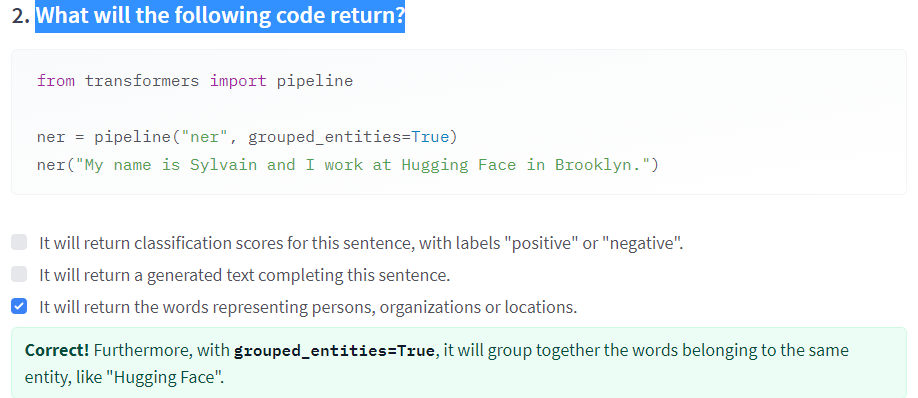

* with grouped_entities=True, it will group together the words belonging to the same entity, like "Hugging Face".

3. What should replace … in this code sample?
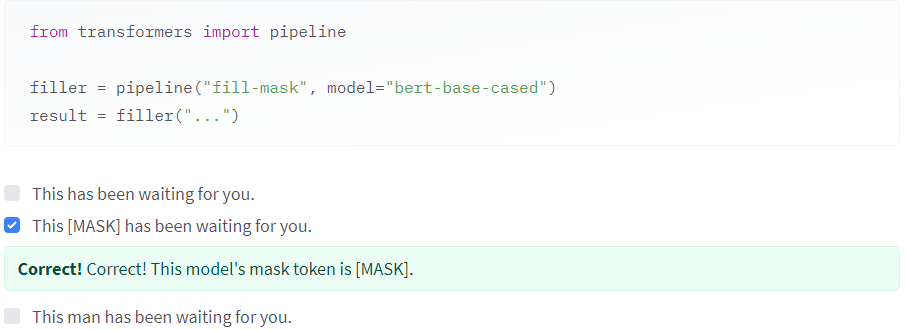

4. Why will this code fail?
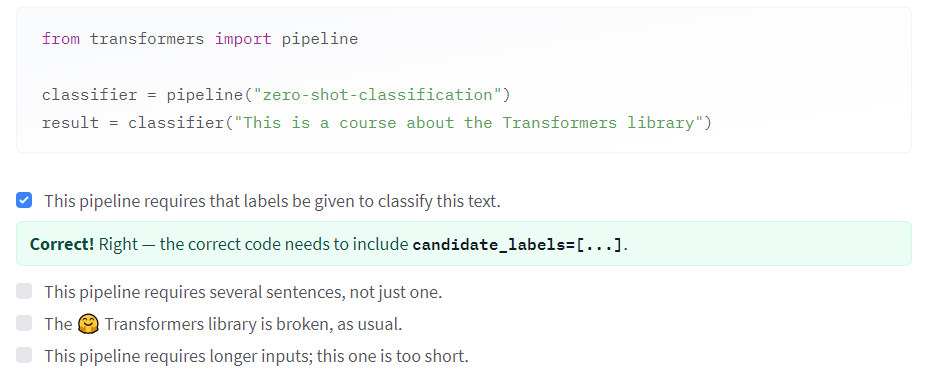

5. What does “transfer learning” mean?
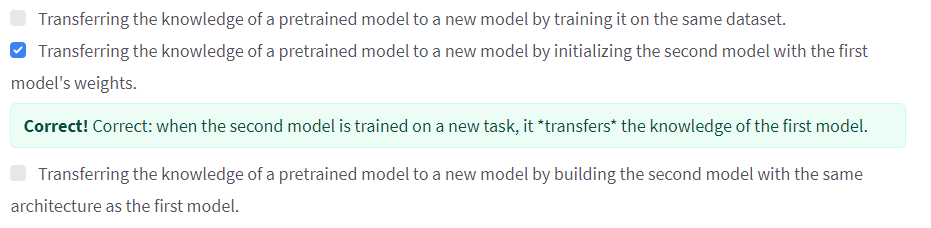

6. True or false? A language model usually does not need labels for its pretraining.
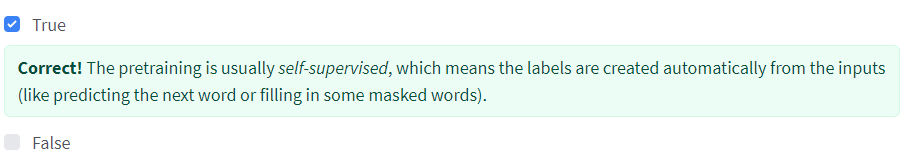

7. Select the sentence that best describes the terms “model,” “architecture,” and “weights.”
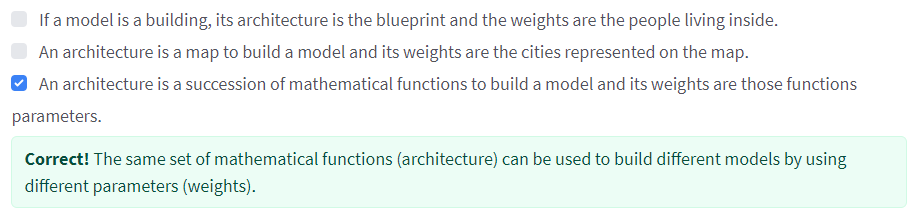

8. Which of these types of models would you use for completing prompts with generated text?
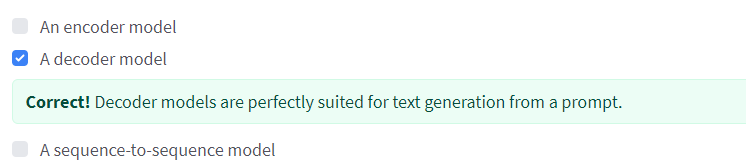

9. Which of those types of models would you use for summarizing texts?
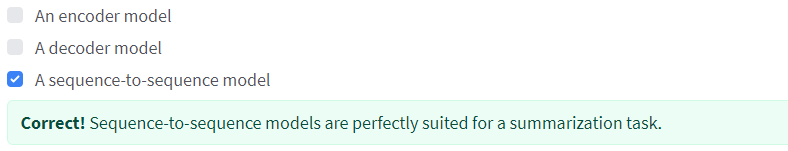

10. Which of these types of models would you use for classifying text inputs according to certain labels?

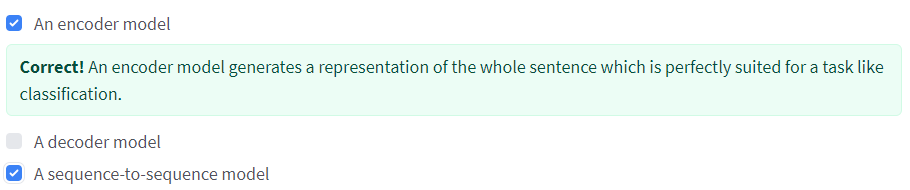

11. What possible source can the bias observed in a model have?

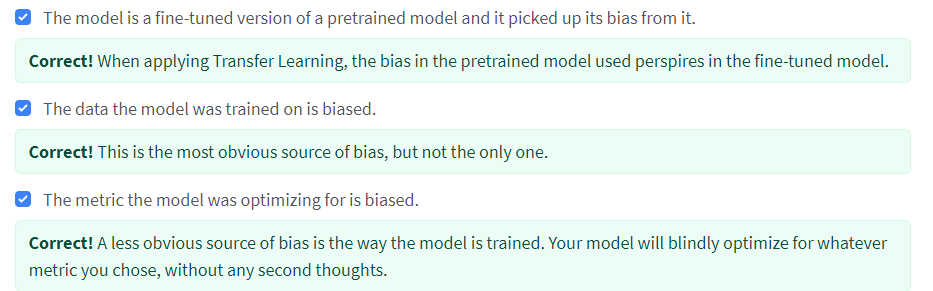

## Using Transformers

#### Problems addressed by transformers

* Transformer models are usually very large. 
* With millions to tens of billions of parameters, training and deploying these models is a complicated undertaking.
* Furthermore, with new models being released on a near-daily basis and each having its own implementation, trying them all out is no easy task.

* The 🤗 Transformers library was created to solve this problem. 
* Its goal is to provide a single API through which any Transformer model can be loaded, trained, and saved. 

## 🤗 Transformersmain features are:

* **Ease of use:** Downloading, loading, and using a state-of-the-art NLP model for inference can be done in just two lines of code.
* **Flexibility:** At their core, all models are simple PyTorch nn.Module or TensorFlow tf.keras.Model classes and can be handled like any other models in their respective machine learning (ML) frameworks.
* **Simplicity:** Hardly any abstractions are made across the library. The “All in one file” is a core concept: a model’s forward pass is entirely defined in a single file, so that the code itself is understandable and hackable.

🤗 Transformers quite different from other ML libraries. 

These models are not built on modules that are shared across files; instead, each model has its own layers. 

In addition to making the models more approachable and understandable, this allows you to easily experiment on one model without affecting others.

## Behind the pipeline



In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier([
    "I've been waiting for a HuggingFace course my whole life.", 
    "I hate this so much!",
])

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558095932007}]

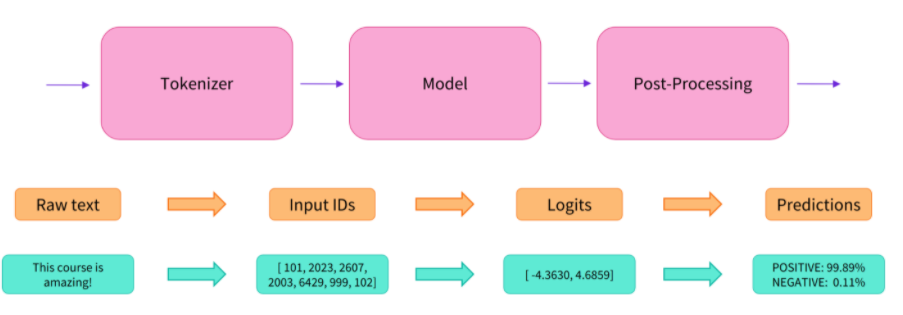

## Preprocessing with a tokenizer

* Transformer models can’t process raw text directly, so the first step of our pipeline is to convert the text inputs into numbers that the model can make sense 

* Tokenizer is responsible for :
    * Splitting the input into words, subwords, or symbols (like punctuation) that are called tokens
    * Mapping each token to an integer
    * Adding additional inputs that may be useful to the model

#### Tokenizer -  **AutoTokenizer** class and its from_pretrained method. 

* The default checkpoint of the sentiment-analysis pipeline is **distilbert-base-uncased-finetuned-sst-2-english**

In [ ]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

* Once we have the tokenizer, we can directly pass our sentences to it
* Output - get back a dictionary that’s ready to feed to our model
* convert the list of input IDs to tensors
* While using Transformers we need not worry about which ML framework is used as a backend.
* Transformer models only accept tensors as input.

* To specify the type of tensors we want to get back (PyTorch, TensorFlow, or plain NumPy), we use the return_tensors argument

In [ ]:
raw_inputs = ["I've been waiting for a HuggingFace course my whole life.", 
              "I hate this so much!",]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


## Output

It is a dictionary containing two keys, 
* input_ids and 
* attention_mask. 

**input_ids** contains two rows of integers (one for each sentence) that are the unique identifiers of the tokens in each sentence. 